In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [13]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([13,150,3,220])
data=np.concatenate([data, outliers])

In [14]:
df=pd.DataFrame(data, columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [15]:
print(df.tail())

         Values
99    47.654129
100   13.000000
101  150.000000
102    3.000000
103  220.000000


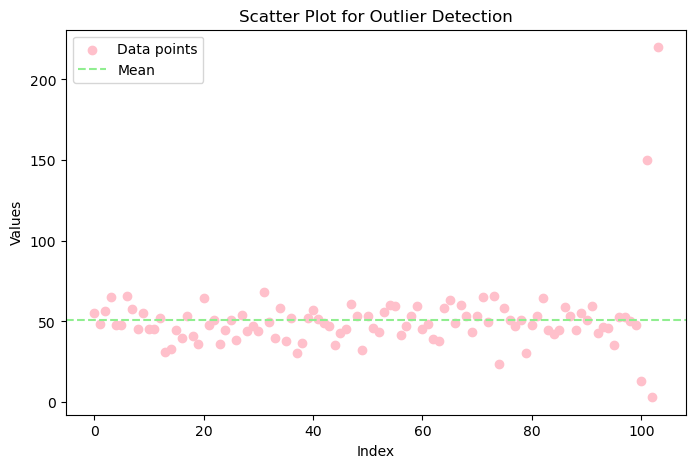

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)), df['Values'], color='pink', label='Data points')
plt.axhline(y=df['Values'].mean(), color='lightgreen', linestyle='--', label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot for Outlier Detection')
plt.legend()
plt.show()

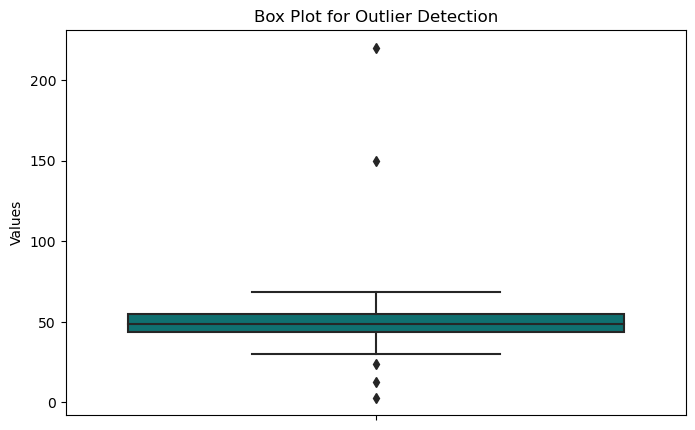

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Values', color='teal')
plt.title('Box Plot for Outlier Detection')
plt.show()

Z-Score Method

Formula: z = ( x - μ ) / σ

In [42]:
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z'] == 'Outlier'])

     Values   Z-score Outlier_Z Outlier_IQR
101   150.0  4.493944   Outlier     Outlier
103   220.0  7.664752   Outlier     Outlier


Inter Quartile Range

Formula: Q3 - Q1

Q3 - 25 percentile
Q1 - 75 percentile

Any value outside the range:
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [43]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR'] == 'Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.222455    Normal     Outlier
100   13.000000 -1.711781    Normal     Outlier
101  150.000000  4.493944   Outlier     Outlier
102    3.000000 -2.164753    Normal     Outlier
103  220.000000  7.664752   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

In [39]:
#Step 1: Create a dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.array([10, 110, 5, 120])
data = np.concatenate([data, outliers])

#Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)
Q2 = np.median(data)
Q3 = np.percentile(data, 75)
min_value = np.min(data)
max_value = np.max(data)

#Step 3: Compute IQR
IQR = Q3 - Q1

#Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

#Step 6: Print Results
print(f"5-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median (Q2) : {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 5.0, Q1: 43.874401021766715, Median (Q2) : 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
